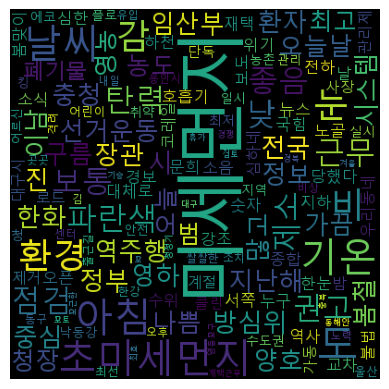

In [1]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 내가 그리고 싶은 크롤링 결과 읽어들임
title_list = pd.read_csv("미세먼지_20240229_10시13분08초.csv", encoding="utf-8-sig")

# 제목 리스트에서 명사, 형용사 추출
okt = Okt()
word_list = []

for title in title_list['title']:
    for word, tag in okt.pos(title):
        if tag in ['Noun', 'Adjective']:
            word_list.append(word)

word_list_count = Counter(word_list)

wc = WordCloud(font_path = 'malgun', width = 400, height = 400)
result = wc.generate_from_frequencies(word_list_count)
plt.axis('off')
plt.imshow(result)
plt.show()
wc.to_file('result.png')